In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.decomposition import PCA
import matplotlib

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
data = pd.read_csv('/content/spam.csv',  encoding='latin-1')
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
data.columns = ["class","message"]
data.head(10)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
data.shape

(5572, 2)

In [4]:
data['length'] = [len(d) for d in data.message]

In [5]:
data.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
data.groupby('class').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

<Axes: xlabel='class', ylabel='count'>

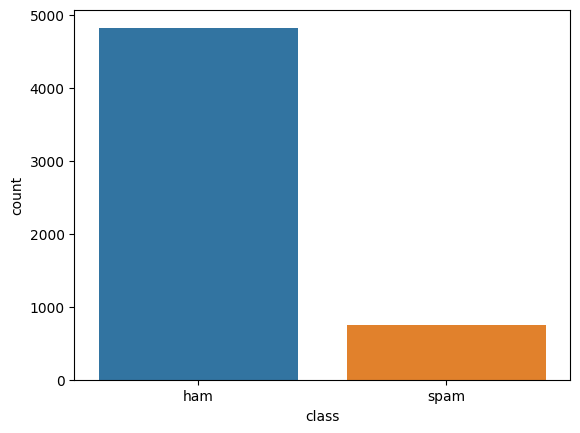

In [7]:
sns.countplot(x=data['class'])


<Axes: xlabel='class', ylabel='length'>

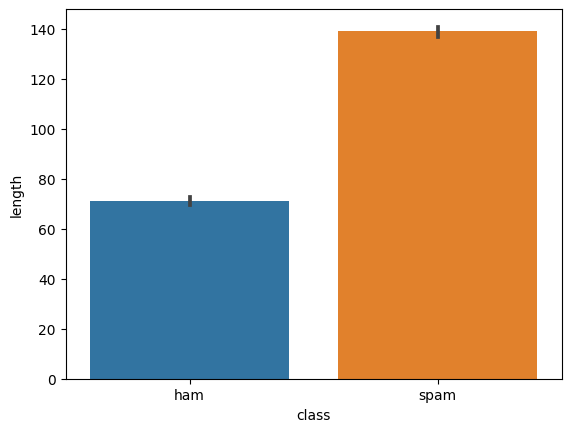

In [8]:
sns.barplot(x=data["class"],y=data["length"])

In [9]:
data.drop(["length"],axis=1,inplace=True)

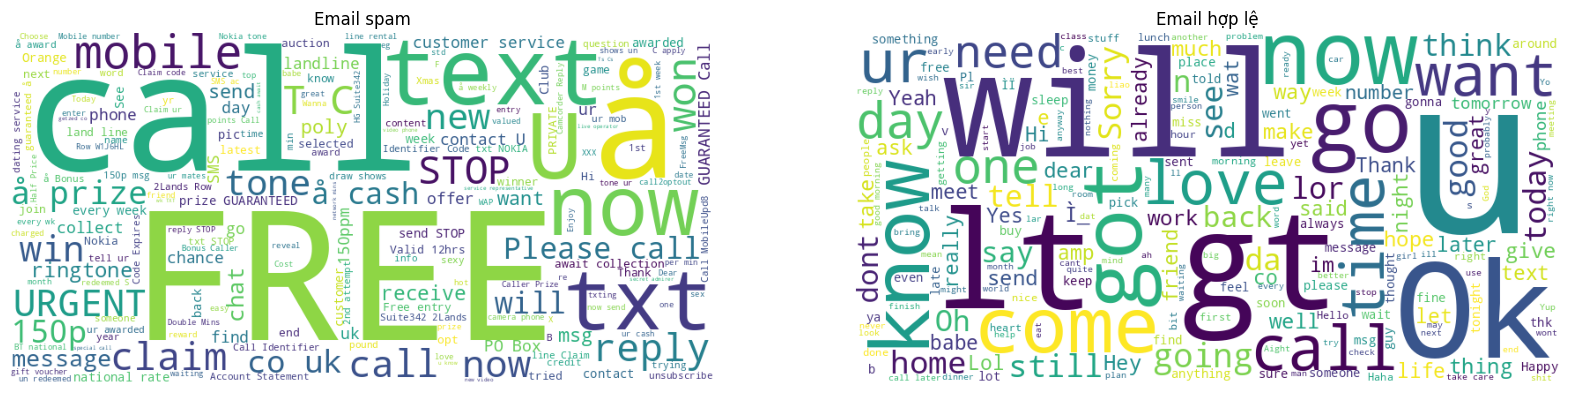

In [10]:
spam_text = ' '.join(data[data['class'] == 'spam']['message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(spam_text)

ham_text = ' '.join(data[data['class'] == 'ham']['message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(ham_text)


fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].imshow(spam_wordcloud)
ax[0].set_title('Email spam')
ax[0].axis('off')

ax[1].imshow(ham_wordcloud)
ax[1].set_title('Email hợp lệ')
ax[1].axis('off')

plt.show()

In [11]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
def transform_message(message):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc)

    # Remove any stopwords for message_not_punc, but first we should
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [13]:
import nltk
nltk.download('stopwords')
data['message'].apply(transform_message)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, å£750, Po...
5568                   [Ì, b, going, esplanade, fr, home]
5569                   [Pity, , mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [14]:
vectorization = CountVectorizer(analyzer=transform_message)

In [15]:
X = vectorization.fit(data["message"])

In [16]:
X_transform = X.transform(data["message"])

In [18]:
print(X_transform)

  (0, 1098)	1
  (0, 1463)	1
  (0, 2029)	1
  (0, 4576)	1
  (0, 5137)	1
  (0, 5138)	1
  (0, 5687)	1
  (0, 6133)	1
  (0, 6817)	1
  (0, 6848)	1
  (0, 7458)	1
  (0, 7569)	1
  (0, 8233)	1
  (0, 8811)	1
  (0, 10848)	1
  (0, 11046)	1
  (1, 2409)	1
  (1, 3014)	1
  (1, 7602)	1
  (1, 8484)	1
  (1, 10584)	1
  (1, 10955)	1
  (2, 75)	1
  (2, 424)	1
  (2, 431)	1
  :	:
  (5568, 6793)	1
  (5568, 7067)	1
  (5568, 11242)	1
  (5569, 0)	1
  (5569, 3171)	1
  (5569, 3657)	1
  (5569, 8149)	1
  (5569, 10089)	1
  (5570, 4432)	1
  (5570, 4975)	1
  (5570, 5171)	1
  (5570, 6198)	1
  (5570, 6614)	1
  (5570, 6712)	1
  (5570, 6894)	1
  (5570, 7192)	1
  (5570, 7299)	1
  (5570, 7700)	1
  (5570, 8316)	1
  (5570, 9806)	1
  (5570, 10672)	1
  (5570, 10889)	1
  (5571, 3372)	1
  (5571, 8245)	1
  (5571, 10534)	1


In [19]:
tfidf_transformer = TfidfTransformer().fit(X_transform)

In [20]:
X_tfidf = tfidf_transformer.transform(X_transform)

In [21]:
print(X_tfidf.shape)

(5572, 11307)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['class'], test_size=0.3,random_state = 50, stratify=data['class'])

In [23]:
X_train,y_train

(357     Ur cash-balance is currently 500 pounds - to m...
 4793          Sorry that was my uncle. I.ll keep in touch
 2542                         Aiyo please Ì_ got time meh.
 1695    Finish already... Yar they keep saying i mushy...
 547                      Sorry that took so long, omw now
                               ...                        
 5170    I'm in school now n i'll be in da lab doing so...
 1677             Lol where do u come up with these ideas?
 3813                       Can. Dunno wat to get 4 her...
 4061    Hi dear we saw dear. We both are happy. Where ...
 198     Hi its Kate how is your evening? I hope i can ...
 Name: message, Length: 3900, dtype: object,
 357     spam
 4793     ham
 2542     ham
 1695     ham
 547      ham
         ... 
 5170     ham
 1677     ham
 3813     ham
 4061     ham
 198      ham
 Name: class, Length: 3900, dtype: object)

In [24]:
bow = CountVectorizer(stop_words='english')

In [25]:
bow.fit(X_train)

CountVectorizer(stop_words='english')

In [26]:
X_train = bow.transform(X_train)
X_test = bow.transform(X_test)

In [27]:
X_train,X_test

(<3900x6880 sparse matrix of type '<class 'numpy.int64'>'
 	with 30144 stored elements in Compressed Sparse Row format>,
 <1672x6880 sparse matrix of type '<class 'numpy.int64'>'
 	with 11627 stored elements in Compressed Sparse Row format>)

In [28]:

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [29]:
print(f'Accuracy : {accuracy_score(y_test, naive_bayes.predict(X_test)):.3f}')
print(f'Precision : {precision_score(y_test, naive_bayes.predict(X_test), pos_label="spam"):.3f}')
print(f'Recall : {recall_score(y_test, naive_bayes.predict(X_test), pos_label="spam"):.3f}')
print(f'F1-Score : {f1_score(y_test, naive_bayes.predict(X_test), pos_label="spam"):.3f}')

Accuracy : 0.983
Precision : 0.967
Recall : 0.906
F1-Score : 0.935


In [30]:
predictions = naive_bayes.predict(X_test)

In [31]:
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [32]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.97      0.91      0.94       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [33]:
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

In [34]:
svm_predictions = svm_clf.predict(X_test)

In [35]:
print (classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.99      0.86      0.92       224

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



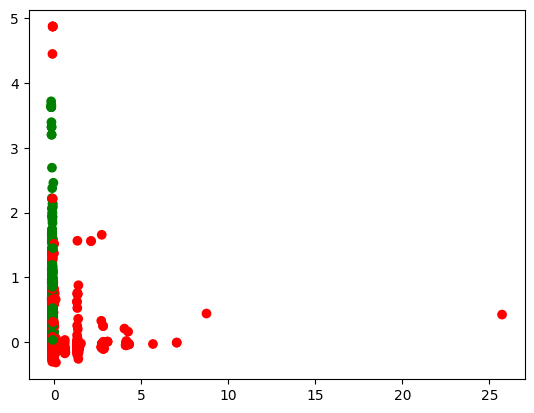

In [36]:
X = bow.fit_transform(data['message'])

# Áp dụng PCA để giảm chiều ma trận từ TF-IDF xuống còn 2 chiều
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

# Vẽ biểu đồ hai chiều của các email
colors = ['red', 'green']
plt.scatter(X_2d[:,0], X_2d[:,1], c=data['class'].apply(lambda x: 0 if x=='ham' else 1), cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

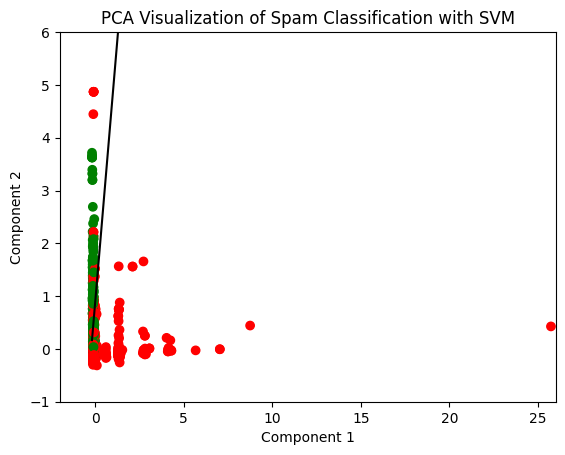

In [37]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt

y = data['class']
clf = svm_clf
clf.fit(X_2d, y)


colors = ['red', 'green']
plt.scatter(X_2d[:,0], X_2d[:,1], c=data['class'].apply(lambda x: 0 if x=='ham' else 1), cmap=matplotlib.colors.ListedColormap(colors))


w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_2d[:,0].min(), X_2d[:,0].max())
yy = a * xx - (clf.intercept_[0]) / w[1]


plt.plot(xx, yy, 'k-')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.ylim(top=6,bottom=-1)
plt.xlim([-2,26])
plt.title('PCA Visualization of Spam Classification with SVM')

plt.show()


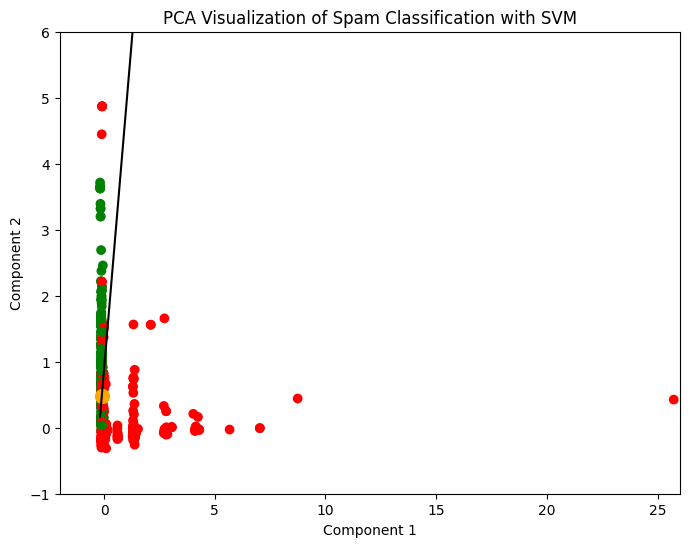

In [38]:
clf.fit(X_2d, y)

new_text = "Free entry call txt now"
new_2d = pca.transform(bow.transform([new_text]).toarray())
if clf.predict(new_2d)[0] == 'ham':
  color = 'blue'
else:
  color = 'orange'

# Tạo danh sách mới chứa cả điểm mới và các điểm trong tập dữ liệu
new_X_2d = np.vstack((X_2d, new_2d))
new_y = pd.concat([y, pd.Series(['test'])])

# Vẽ biểu đồ scatter plot cho mỗi loại điểm
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_2d[:,0], X_2d[:,1], c=y.apply(lambda x: 0 if x=='ham' else 1), cmap=matplotlib.colors.ListedColormap(['red', 'green']), label='Data points')
ax.scatter(new_2d[:,0], new_2d[:,1], c=color, s=100, label='New point')
ax.plot(xx, yy, 'k-', label='SVM')

# Đặt nhãn cho trục x và trục y, và hiển thị biểu đồ
# plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.ylim(top=6,bottom=-1)
plt.xlim([-2,26])
plt.title('PCA Visualization of Spam Classification with SVM')
plt.show()

In [39]:
svm_clf.fit(X, y)


new_X = bow.transform([new_text]).toarray()


if svm_clf.predict(new_X)[0] == 'ham':
  print("Day là tin nhắn hợp lệ (ham)")
else:
  print("Day là tin nhắn rác (spam)")

Day là tin nhắn hợp lệ (ham)


In [40]:
data['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"